c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realb

c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realb

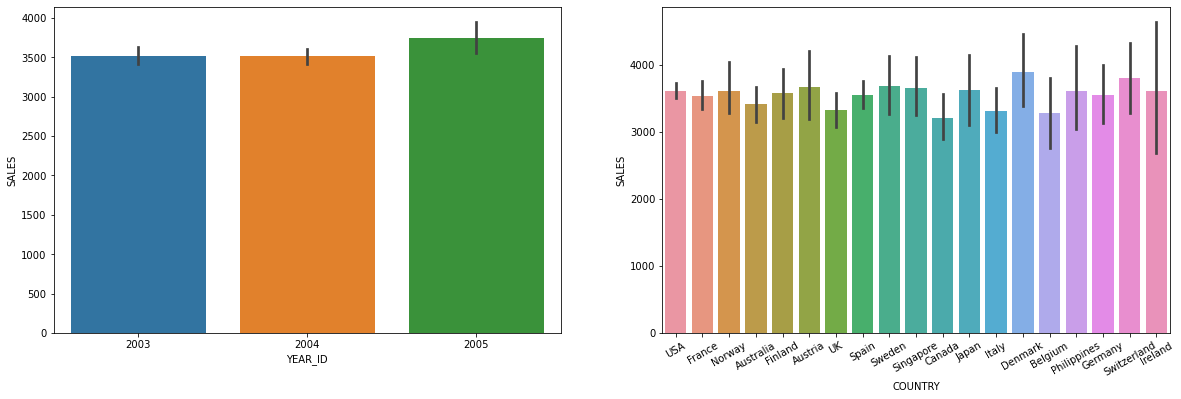

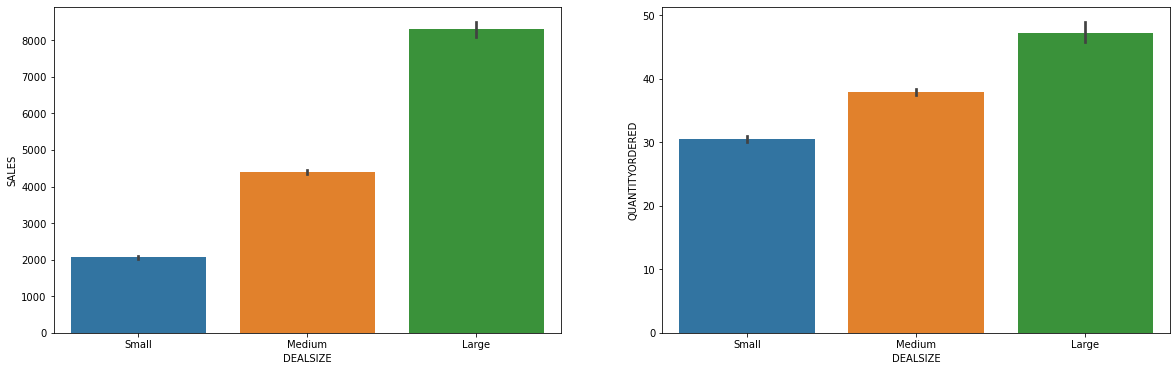

In [10]:
import nltk
import string
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd
from PIL import ImageTk, Image
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


#coli = ["Shipment analysis","Plant and Carrier capacity"]
#coli = ["Churn analysis","General Survey"]
#coli = ["Sales per country","Dealsize analysis","Failed delivery status","Geographical distribution"]
coli = ["HR:-","Churn analysis","General Survey","Sales:-","Sales per country","Dealsize analysis","Failed delivery status","Geographical distribution","Operations:-","Plant and Carrier capacity","Shipment analysis"]

def CheckS():      # on clicking
    
    
    if clickedS.get()=="Dealsize analysis":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        
        
        x = ex[col_detect(ex.columns.to_list(),"dealsize deal size")[0]]
        y = [col_detect(ex.columns.to_list(),"sales income revenue")[0],
         col_detect(ex.columns.to_list(),"quantityordered quantity")[0]]
        
        f, axes = plt.subplots(1, 2,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
        
        axes = axes.flatten()
    
    
        for i in range(2):
            pl = sns.barplot(  x=x , y=ex[y[i]] , data=ex , ax=axes[i])    
        #pl = sns.barplot(  x=x, y= ex[y[1]], data=ex , ax=axes[1])
        
            
        
        f.savefig("photo/Salesplot2.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot2.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        
        Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'dealsize deal size')[0]} graph we conclude that :"+'\n')
        Text1.insert(tk.END,f"1) {ex[col_detect(ex.columns.to_list(),'dealsize deal size')[0]].value_counts().idxmin()} {col_detect(ex.columns.to_list(),'dealsize deal size')[0]} is good for {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
        Text1.insert(tk.END,f"2) {ex[col_detect(ex.columns.to_list(),'dealsize deal size')[0]].value_counts().idxmax()} {col_detect(ex.columns.to_list(),'dealsize deal size')[0]} is not good for {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n\n')

        table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'quantityordered quantity')[0], columns=[col_detect(ex.columns.to_list(),'dealsize deal size')[0]], aggfunc=np.average)
        table.iloc[0,1],table.columns[1]
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'quantityordered quantity')[0]} graph we clearly see that:"+'\n')
        
        for i in range(3):
            Text1.insert(tk.END,f"1) {col_detect(ex.columns.to_list(),'quantityordered quantity')[0]} around {int(table.iloc[0,i])} is considered {table.columns[i]}"+'\n')
        
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
        
        
    if clickedS.get()=="Failed delivery status":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        
        ex = ex[ex["STATUS"]!="Shipped"]
        y = ["TERRITORY","DEALSIZE","COUNTRY"]
        
        f, axes = plt.subplots(1, 3,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
        plt.xticks(rotation=10)
        
        axes = axes.flatten()
    
        for i in range(3):
            data_crosstab = pd.crosstab(ex[y[i]],ex["STATUS"], margins = False)
            pl = data_crosstab.plot.bar(stacked=True,ax = axes[i],rot=10)
        
        #data_crosstab = pd.crosstab(y["TERRITORY"],y["STATUS"], margins = False)
        #pl = data_crosstab.plot.bar(stacked=True,ax = axes[0])
        
        #data_crosstab = pd.crosstab(y["TERRITORY"],y["STATUS"], margins = False)
        #pl = data_crosstab.plot.bar(stacked=True,ax = axes[0])
        
            #if str(ex[y[i]].dtype) == "float64" and ex[y[i]].value_counts().shape[0]>4:
            #    pl = sns.lineplot(  y=y[i], x= x, data=ex , ax=axes[i])
            #else:    
            #    pl = sns.barplot(  y=y[i], x= x, data=ex , ax=axes[i])
            
            
        f.savefig("photo/Salesplot3.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot3.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')
        Text1.insert(tk.END,"From the TERRITORY graph we conclude that :"+'\n')
        Text1.insert(tk.END,"1) Most shipments are Cancelled in the EMEA TERRITORY"+'\n')
        Text1.insert(tk.END,"2) Least shipments are Cancelled in the APAC TERRITORY"+'\n')
        Text1.insert(tk.END,"3) NO shipments are Cancelled in the JAPAN TERRITORY"+'\n\n')
        
        Text1.insert(tk.END,"From the DEALSIZE graph we conclude that :"+'\n')
        Text1.insert(tk.END,"1) Large DEALSIZE should be promoted as no deals are Cancelled"+'\n')
        Text1.insert(tk.END,"2) Small and Medium DEALSIZE should NOT be promoted as most deals are either Cancelled or On Hold"+'\n\n')
        
        Text1.insert(tk.END,"From the COUNTRY graph we clearly see that:"+'\n')
        Text1.insert(tk.END,"1) In USA most deals are Cancelled or On Hold"+'\n')
        Text1.insert(tk.END,"2) Cancelled deals are highest in Sweden"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
    if clickedS.get()=="Geographical distribution":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        
        x = ex["SALES"]
        y = ["YEAR_ID","QUANTITYORDERED"]
        
        f, axes = plt.subplots(1, 2,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
        
        plt.legend(loc="upper right")
        axes = axes.flatten()
        
    
        #for i in range(2):
            #if str(ex[y[i]].dtype) == "float64" and ex[y[i]].value_counts().shape[0]>4:
            #    pl = sns.lineplot(  y=y[i], x= x, data=ex , ax=axes[i])
            #else:    
            #    pl = sns.barplot(  y=y[i], x= x, data=ex , ax=axes[i])
            
        pl = sns.barplot(  y= ex["SALES"], x= ex["TERRITORY"], data=ex , ax=axes[0])    
        #pl = sns.barplot(  y=ex["QUANTITYORDERED"], x= ex["DEALSIZE"], data=ex , ax=axes[1])
        
        data_crosstab = pd.crosstab(ex['TERRITORY'],ex['COUNTRY'], margins = False)
        #data_crosstab = data_crosstab.transpose()
        pl = data_crosstab.plot.bar(stacked=True,ax=axes[1],rot=0)
        
            
        
        f.savefig("photo/Salesplot3.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot3.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')
        Text1.insert(tk.END,"From the TERRITORY graph we conclude that :"+'\n')
        Text1.insert(tk.END,"1) Sales are highest in JAPAN TERRITORY despite less countries contributing to our sales because no shipment is Cancelled or On Hold"+'\n')
        Text1.insert(tk.END,"2) Sales are lowest in APAC TERRITORY because it has less countries contributing to our sales and most of the shipments are In Process or Disputed"+'\n\n')

        Text1.insert(tk.END,"From the COUNTRY graph we clearly see that:"+'\n')
        Text1.insert(tk.END,"1) Australia contributes most in APAC TERRITORY"+'\n')
        Text1.insert(tk.END,"2) Spain and Switzerland contributes most in EMEA TERRITORY"+'\n')
        Text1.insert(tk.END,"3) Japan and Singapore contributes most in JAPAN TERRITORY"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)    
    
    
    if clickedS.get()=="General Survey":
        
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
            
            
        x = ex[col_detect(ex.columns.to_list(),"seniorcitizen senior citizen old people")[0]]
        #y = ["InternetService","PaymentMethod","TechSupport"]
        y = [col_detect(ex.columns.to_list(),"InternetService Internet")[0],
             col_detect(ex.columns.to_list(),"PaymentMethod Payment")[0],
             col_detect(ex.columns.to_list(),"TechSupport Technology")[0]]
        
        
        
        f, axes = plt.subplots(1, 3,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)

        
        axes = axes.flatten()
    
        con = []
        for i in range(3):
                data_crosstab = pd.crosstab(ex[y[i]],x, margins = False)
                pl = data_crosstab.plot.bar(stacked=True, ax=axes[i],rot=8)
            
                d = data_crosstab.transpose()
                c = []
                for j in d.columns.to_list():
                    c.append([j,d[j][0]+d[j][1]])
                def Sort(sub_li):
                        sub_li.sort(key = lambda x: x[1],reverse = True)
                        return sub_li
                con.append(Sort(c)[0][0])  ## append
            #data_crosstab = pd.crosstab(ex[y[i]],x, margins = False)
            #pl = data_crosstab.plot.bar(stacked=True, ax=axes[i],rot=0)
            #if str(ex[y[i]].dtype) == "float64" and ex[y[i]].value_counts().shape[0]>4:
            #    pl = sns.lineplot(  y=y[i], x= x, data=ex , ax=axes[i])
            #else:    
            #    pl = sns.barplot(  y=y[i], x= x, data=ex , ax=axes[i])
            
            
        f.savefig("photo/HrplotG.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/HrplotG.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        
    
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"From this we conclude that :"+'\n\n')
        for i in range(2):
            Text1.insert(tk.END,f"{i+1}) {con[i]} is popular among citizens irrespective of their ages"+'\n')
        Text1.insert(tk.END,"3) Almost everyone prefers having an internet service"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
    if clickedS.get()=="Plant and Carrier capacity":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    
        f, axes = plt.subplots(1, 3,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
        plt.xticks(rotation=0)

        axes = axes.flatten()


        pl = sns.barplot(data=ex, x='Plant Code',estimator=max,y='Total wt',ax = axes[0])
        #ax.set_ylabel("Total Weight")
        pl = sns.barplot(data=ex, x='Carrier',estimator=max,y='Total wt',ax = axes[1])
        
        pl = sns.barplot(data=ex, x='Plant Code',estimator=max,y='Unit quantity',ax = axes[2])



        #for i in range(2):

         #   pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])


        f.savefig("photo/OPplot1.jpg")

        top.logo = ImageTk.PhotoImage(Image.open("photo/OPplot1.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)    

        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"\n\n"+"So you are from the Operations department"+'\n\n')
        Text1.insert(tk.END,"From the Plant Code graph we conclude that :"+'\n')
        Text1.insert(tk.END,"1) PLANT03 plant handles the most weight for processing"+'\n')
        Text1.insert(tk.END,"2) PLANT09 handles the second most weight for processing"+'\n\n')

        Text1.insert(tk.END,"From the Carrier graph we conclude that :"+'\n')
        Text1.insert(tk.END,"1) V444_0 carries the most weight"+'\n')
        Text1.insert(tk.END,"2) V444_1 carries the least weight"+'\n\n')
        
        Text1.insert(tk.END,"From the Unit Quantity we clearly see that:"+'\n')
        Text1.insert(tk.END,"1) PLANT03 plant handles the most Unit Quantity"+'\n')
        Text1.insert(tk.END,"2) PLANT09 plant handles the second most Unit Quantity"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)

        
def operations_analysis():
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    
    f, axes = plt.subplots(1, 2,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=30)
    
    axes = axes.flatten()
    
    
    pl = sns.barplot(data=ex, x='Origin Port',estimator=max,y='Total wt', hue='Destination Port',ax=axes[0])
    #ax.set_ylabel("Total Weight")
    pl = sns.scatterplot(data=ex, x='Ship ahead day count',y='Total wt',estimator=max,hue="Ship Late Day count",ax=axes[1])
    
    
    
    #for i in range(2):
        
     #   pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])
        
        
    f.savefig("photo/OPplot1.jpg")
        
    top.logo = ImageTk.PhotoImage(Image.open("photo/OPplot1.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)    
        
    Text1.configure(state=tk.NORMAL)
    Text1.delete("0.0",tk.END)
    Text1.insert(tk.END,"\n\n"+"So you are from the Operations department"+'\n\n')
    Text1.insert(tk.END,"From the Origin Port graph we visualise the Origin Port and Destination Port for our product :"+'\n')
    Text1.insert(tk.END,"1) Almost all shipments start from PORT04"+'\n')
    Text1.insert(tk.END,"2) PORT05 is almost useless "+'\n')
    Text1.insert(tk.END,"3) All deliveries reach PORT09 as Destination Port "+'\n\n')

    Text1.insert(tk.END,"From the second graph we clearly see that:"+'\n')
    Text1.insert(tk.END,"1) Higher weight shipments show no Ahead or Delay"+'\n')
    Text1.insert(tk.END,"2) Lesser weight shipments show high Ahead and Delay"+'\n')
    Text1.insert(tk.END,"3) So higher weight shipments should be promoted"+'\n')
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
        
        
        
        
        
def sales_analysis():      # first page
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    #y = ex["SALES"]
    #x = ["YEAR_ID","COUNTRY"]
    
    y = ex[col_detect(ex.columns.to_list(),"sales income revenue")[0]]
    x = [col_detect(ex.columns.to_list(),"year_id year")[0],
         col_detect(ex.columns.to_list(),"country")[0]]
    
    
    f, axes = plt.subplots(1, 2,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=30)
    
    axes = axes.flatten()
    
    for i in range(2):
        pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])
        
        
    f.savefig("photo/Salesplot1.jpg")
        
    top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot1.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)    
        
    Text1.configure(state=tk.NORMAL)             
    Text1.delete("0.0",tk.END) 
    Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')                    
    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'year_id year')[0]} graph we conclude that :"+'\n')
    Text1.insert(tk.END,f"1) {col_detect(ex.columns.to_list(),'sales income revenue')[0]} have been more in the year {ex[col_detect(ex.columns.to_list(),'year_id year')[0]].value_counts().idxmin()}"+'\n')
    Text1.insert(tk.END,f"2) {col_detect(ex.columns.to_list(),'sales income revenue')[0]} have been minimum in the year {ex[col_detect(ex.columns.to_list(),'year_id year')[0]].value_counts().idxmax()}"+'\n\n')
    

    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'country')[0]} graph we clearly see that:"+'\n')
    Text1.insert(tk.END,f"1) {ex[col_detect(ex.columns.to_list(),'country')[0]].value_counts().idxmin()} has the highest {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
    Text1.insert(tk.END,f"2) {ex[col_detect(ex.columns.to_list(),'country')[0]].value_counts().idxmax()} has least {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED) 

        
def churn_analysis(res):
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    
    res1 = nltk.word_tokenize(res)[0]
    
    num_cols = ex._get_numeric_data().columns
    num_cols.to_list()
    
    # Numerical Columns
    
    
    
    # categorical columns
    cat_cols = [x for x in ex.columns if x not in num_cols]
    
    t = []
    Flag  = False  # H0                 chi2 test for categorical columns

    for i in cat_cols:
        data_crosstab = pd.crosstab(ex[i],ex[res1], margins = False)

        table = np.array(data_crosstab)
        stat, p, dof, expected = chi2_contingency(table)
        #print('dof=%d' % dof)
        #print(expected)
        # interpret test-statistic
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        #print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            Flag = True       #Dependent (reject H0)
        else:
            Flag = False        #Independent (fail to reject H0)

        if Flag==True:
            t.append([i,abs(stat)])
    
    def Sort(sub_li):
        sub_li.sort(key = lambda x: x[1],reverse = True)
        return sub_li
    
    # text box
    tsrt = Sort(t)
    Text1.configure(state=tk.NORMAL)
    con = []
    for j in range(1,6):
        
        data_crosstab = pd.crosstab(ex[tsrt[j][0]],ex[res1], margins = False)
        data_crosstab = data_crosstab.transpose()
        
        l = []
        for i in range(data_crosstab.shape[1]):
            nr = data_crosstab.iloc[0][i]/data_crosstab.iloc[1][i]
            l.append([data_crosstab.columns[i],nr])
        
        lsrt = Sort(l)
        Text1.insert(tk.END,"\n\n"+str(j)+")"+tsrt[j][0]+ "\n")
        Text1.insert(tk.END,"\n"+lsrt[0][0]+" "+"type "+"should be promoted as it has less Churn")
        Text1.insert(tk.END,"\n"+lsrt[-1][0]+" "+"type "+"should NOT be promoted as it has more Churn")
        
        con.append([lsrt[0][0],lsrt[-1][0],tsrt[j][0]])
        
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
  
    #Canvas plot
    
    f, axes = plt.subplots(1, 4,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=0)
    
    axes = axes.flatten()
    
    for i in range(4):
        data_crosstab = pd.crosstab(ex[tsrt[i+1][0]],ex[res1], margins = False)
        pl = data_crosstab.plot.bar(stacked=True, ax=axes[i],rot=0) 
        
    f.savefig("photo/Churnplot.jpg")
    
    top.logo = ImageTk.PhotoImage(Image.open("photo/Churnplot.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
    
    Text1.configure(state=tk.NORMAL)
    Text1.insert(tk.END,"\n\n"+"From this we conclude that:"+'\n\n')
    Text1.insert(tk.END,"We are losing customers because of:"+'\n')
    for i in range(3):
    
        Text1.insert(tk.END,f"{i+1}) {con[i][1]} type {con[i][2]}"+'\n')
    
    
    Text1.insert(tk.END,"\n\n"+"To increase customers we should:"+'\n')
    for i in range(3):
    
        Text1.insert(tk.END,f"{i+1}) {con[i][0]} type {con[i][2]}"+'\n')
        
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
    


def plot_graph(res):
    
    ex = pd.read_csv(files[-1],encoding='unicode_escape')
    res1 = nltk.word_tokenize(res)
    f, axes = plt.subplots(2, 2,figsize=(9,6))
    #sns.barplot(x="DEALSIZE",y="SALES",data=ex)
    
    
    axes = axes.flatten()
    
    if str(ex[res1[0]].dtype) == "float64" :
             for i in range(4):
                if str(ex[res1[i+1]].dtype) == "float64" or str(ex[res1[i+1]].dtype) == "int64":
                    pl = sns.scatterplot(  y=res1[0], x= res1[i+1], data=ex , ax=axes[i])
                else:    
                    pl = sns.barplot(  y=res1[0], x= res1[i+1], data=ex , ax=axes[i])
        
    else :
             for i in range(4):
                if str(ex[res1[i+1]].dtype) == "float64" or str(ex[res1[i+1]].dtype) == "int64":
                    pl = sns.barplot(y=res1[0], x= res1[i+1], data=ex , ax=axes[i])
                else:    
                    pl = sns.barplot(y=res1[0], x= res1[i+1], data=ex , ax=axes[i])

    
    f.savefig("photo/multiplot.jpg")
    
    top.logo = ImageTk.PhotoImage(Image.open("photo/multiplot.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
    
def col_detect(collist,keystring):
    robo_response=[]
    collist.append(keystring)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(collist)
    vals = cosine_similarity(tfidf[-1], tfidf)     #32
    
    import re
    cl = collist
    for i in range(-2,0-int(len(cl)/2),-1):
        review = re.sub('[^a-zA-Z_]', '',cl[vals.argsort()[0][i]])
        #review = cl[vals.argsort()[0][i]]
        robo_response.append(review)
        
    
    return robo_response    
    
    
    

def explore_columns(coli):
    pass
    #coli = ["Shipment analysis","Plant and Carrier capacity"]
    #coli = ["Churn analysis","General Survey"]
    #if clicked.get() == "Sales":
    #    coli = ["Sales per country","Dealsize analysis","Failed delivery status","Geographical distribution"]
    
    #clickedS = tk.StringVar()
    #DropS = tk.OptionMenu(FrameS, clickedS,*coli)
    #clickedS.set("Select")
    #DropS.place(relx=0.10, rely=0.2, height=38, width=180)
    
    #DropS.mainloop()
    
                
'''
    FrameS = tk.Frame(top)
    FrameS.place(relx=0.400, rely=0.575, relheight=0.268
            , relwidth=0.171)
    FrameS.configure(relief='groove')
    FrameS.configure(borderwidth="2")
    FrameS.configure(relief="groove")
    FrameS.configure(background="#d9d9d9")
    FrameS.configure(highlightbackground="#d9d9d9")
    FrameS.configure(highlightcolor="black")

    LabelS = tk.Label(FrameS)
    LabelS.place(relx=0.190, rely=0.057, height=28, width=120)
    LabelS.configure(activebackground="#f9f9f9")
    LabelS.configure(activeforeground="black")
    LabelS.configure(background="#d9d9d9")
    LabelS.configure(disabledforeground="#a3a3a3")
    LabelS.configure(foreground="#000000")
    LabelS.configure(highlightbackground="#d9d9d9")
    LabelS.configure(highlightcolor="black")
    LabelS.configure(text="Select Analysis",font=("Verdana",9))

    clickedS = tk.StringVar()
    DropS = tk.OptionMenu(FrameS, clickedS,*coli)
    clickedS.set("Select")
    DropS.place(relx=0.10, rely=0.2, height=38, width=180)

    
    Check_button = tk.Button(FrameS)
    Check_button.place(relx=0.10, rely=0.7, height=38, width=100)
    Check_button.configure(text="Check",command=CheckS)
    
'''
    



files = []


# NLTK    #senttokens = col_list


lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def response(collist,keystring):
    robo_response=''
    collist.append(keystring)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(collist)
    vals = cosine_similarity(tfidf[-1], tfidf)     #32
    
    import re
    cl = collist
    for i in range(-2,0-int(len(cl)/2),-1):
        review = re.sub('[^a-zA-Z]', '',cl[vals.argsort()[0][i]])
        #review = cl[vals.argsort()[0][i]]
        robo_response += review +'\n\n'
        
    #idx=vals.argsort()[0][-2]
    #jdx=vals.argsort()[0][-3]
    #kdx=vals.argsort()[0][-4]
    #flat = vals.flatten()
    #flat.sort()
    #req_tfidf = flat[-2]
    

    #if(req_tfidf==0):
        #robo_response=robo_response+"I am sorry! I don't understand you"
        #return robo_response
    #else:
        #robo_response = robo_response+st[idx]+'\n\n'+st[jdx] +'\n\n'+st[kdx]
        #return robo_response
    return robo_response

# Functions

        
        
def print_answers():
    
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except: #67

        try:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        except:  # 67
            Text1.configure(state=tk.NORMAL)
            Text1.delete("0.0", tk.END)
            Text1.insert(tk.END, "Please select dataset")
            Text1.configure(font=("Arial", 12))
            Text1.configure(state=tk.DISABLED)
        
    coli = ex.columns.to_list()
    
    #HR
    if clicked.get()=="HR":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from HR department"+'\n\n'+ "CHURN ANALYSIS for the given dataset"+"\n"+"Following factors play a major role.")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        key = "employ income salary bonus working hours employee rating churn"
        
             
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        #Text1.configure(state=tk.NORMAL)
        #Text1.insert(tk.END,"\n\n"+res)
        #Text1.configure(font=("Arial",12))
        #Text1.configure(state=tk.DISABLED)
        
        explore_columns(coli)
        churn_analysis(res)
        
    
    #Sales
    if clicked.get()=="Sales":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from Sales department"+'\n\n'+ "Following columns from dataset may be of your interest")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        key = "profit sales growth lead employee sales"
        
        
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        Text1.configure(state=tk.NORMAL)
        Text1.insert(tk.END,"\n\n"+res)
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        #plot_graph(res)
        
        coli = ["Geogarphical Sales Analysis", "Failed transaction"]
        
        explore_columns(coli)
        sales_analysis()
     
    #Operations  
    if clicked.get()=="Operations":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from Operations department"+'\n\n'+ "Following columns from dataset may be of your interest")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        key = "manufacture process logistic parcel order service date delivery travel transportation machine condition machine work"
        
        
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        Text1.configure(state=tk.NORMAL)
        Text1.insert(tk.END,"\n\n"+res)
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
     
        #plot_graph(res)
        explore_columns(coli)
        
        operations_analysis()
    #Finance
    if clicked.get()=="Finance":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from Finance department"+'\n\n'+ "Following columns from dataset may be of your interest")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
        key = "funds stock capital invest yearly monthly"
        
        
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        Text1.configure(state=tk.NORMAL)
        Text1.insert(tk.END,"\n\n"+res)
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        plot_graph(res)
        explore_columns(coli)
        
    
  

def clear_files():
    Text1.configure(state=tk.NORMAL)
    Text1.delete("0.0",tk.END)
    Text1.insert(tk.END,"All uploads been removed"+'\n\n'+ "Please select dataset")
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
    files.clear()
    

def null():
        
        ex = pd.read_csv(str(files[0]))
        #ex = pd.read_csv("EQ_2021_Data_Sample.csv")
        nu = ex.isnull().sum()
        nbsrt = nu.sort_values(ascending=False)

        bar = nbsrt.plot(kind="bar",figsize=(10,6))
        fig = bar.get_figure()
        fig.savefig("photo/barnull.jpg")
        #gif1 = tk.PhotoImage(file='./barnull.gif')
        #Canvas1.create_image(0, 0, image=gif1,anchor=tk.NW)
        top.logo = ImageTk.PhotoImage(Image.open("photo/barnull.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        #.Label1.configure(image=img)
        
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"Column name"+"--" +"Null values"+"\n\n")         
        for i in range(ex.shape[1]):
            Text1.insert(tk.END,ex.columns[i]+"--" +str(ex[ex.columns[i]].isnull().sum())+"\n\n")     
        
        Text1.configure(font=("Verdana",8))
        Text1.configure(state=tk.DISABLED)

def browseFiles():
    filename = filedialog.askopenfilename(initialdir = "/",
                                          title = "Select a File",
                                          filetypes = (("Text files",
                                                        "*.txt*"),
                                                       ("all files",
                                                        "*.*")))
      
    # Change label contents
    
    files.append(filename)
    if len(files[-1])>1:
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,filename +'\n\n'+ "Dataset has been selected")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
    else:
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,filename +'\n\n'+ "Please select dataset")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)

        
        
        
def info():
    ex = pd.read_csv(str(files[-1]))
    
    
    Text1.configure(state=tk.NORMAL)
    Text1.delete("0.0",tk.END)
    Text1.insert(tk.END,"Column name"+"--"+ "Data type" +"Null values"+"\n\n")    
    for i in range(ex.shape[1]):
        Text1.insert(tk.END,ex.columns[i]+"--" + "Data type :"+ str(ex[ex.columns[1]].dtype)+"\n\n")     

    Text1.configure(font=("Verdana",8))
    Text1.configure(state=tk.DISABLED)
    


# GUI        
top = tk.Tk()
top.geometry("1294x731+51+124")
top.minsize(148, 1)
top.maxsize(1906, 1037)
top.resizable(1, 1)
top.title("Storyboard")
top.configure(background="#d9d9d9")
top.configure(highlightbackground="#d9d9d9")
top.configure(highlightcolor="black")




#Place all components in screen
  
clickedS = 0
    
scroll = tk.Scrollbar(top)
scroll.place(relx=0.969,rely=0.562,relheight=0.387) 


Text1 = tk.Text(top)
Text1.place(relx=0.587, rely=0.561, relheight=0.387, relwidth=0.381)
Text1.configure(background="white")
Text1.configure(font="TkTextFont")
Text1.configure(foreground="black")
Text1.configure(highlightbackground="#d9d9d9")
Text1.configure(highlightcolor="black")
Text1.configure(insertbackground="black")
Text1.configure(selectbackground="blue")
Text1.configure(selectforeground="white")
Text1.configure(wrap="word")

scroll.config(command=Text1.yview())


Canvas1 = tk.Canvas(top)
Canvas1.place(relx=0.033, rely=0.015, relheight=0.534
                , relwidth=0.936)
Canvas1.configure(background="#d9d9d9")
Canvas1.configure(borderwidth="2")
Canvas1.configure(highlightbackground="#d9d9d9")
Canvas1.configure(highlightcolor="black")
Canvas1.configure(insertbackground="black")
Canvas1.configure(relief="ridge")
Canvas1.configure(selectbackground="#ffffff")
Canvas1.configure(selectforeground="white")


Button2 = tk.Button(top)
Button2.place(relx=0.062, rely=0.917, height=33, width=96)
Button2.configure(activebackground="#ececec")
Button2.configure(activeforeground="#000000")
Button2.configure(background="#d9d9d9")
Button2.configure(disabledforeground="#a3a3a3")
Button2.configure(foreground="#000000")
Button2.configure(highlightbackground="#d9d9d9")
Button2.configure(highlightcolor="black")
Button2.configure(pady="0")
Button2.configure(text='''Upload file''', command=browseFiles)


Button5 = tk.Button(top)
Button5.place(relx=0.355, rely=0.917, height=33, width=106)
Button5.configure(activebackground="#ececec")
Button5.configure(activeforeground="#000000")
Button5.configure(background="#d9d9d9")
Button5.configure(disabledforeground="#a3a3a3")
Button5.configure(foreground="#000000")
Button5.configure(highlightbackground="#d9d9d9")
Button5.configure(highlightcolor="black")
Button5.configure(pady="0")
Button5.configure(text='''Cancel uploads''', command = clear_files)

Frame1 = tk.Frame(top)
Frame1.place(relx=0.039, rely=0.575, relheight=0.268, relwidth=0.251)
Frame1.configure(relief='groove')
Frame1.configure(borderwidth="2")
Frame1.configure(relief="groove")
Frame1.configure(background="#d9d9d9")
Frame1.configure(highlightbackground="#d9d9d9")
Frame1.configure(highlightcolor="black")


FrameS = tk.Frame(top)
FrameS.place(relx=0.400, rely=0.575, relheight=0.268, relwidth=0.171)
FrameS.configure(relief='groove')
FrameS.configure(borderwidth="2")
FrameS.configure(relief="groove")
FrameS.configure(background="#d9d9d9")
FrameS.configure(highlightbackground="#d9d9d9")
FrameS.configure(highlightcolor="black")


LabelS = tk.Label(FrameS)
LabelS.place(relx=0.190, rely=0.057, height=28, width=120)
LabelS.configure(activebackground="#f9f9f9")
LabelS.configure(activeforeground="black")
LabelS.configure(background="#d9d9d9")
LabelS.configure(disabledforeground="#a3a3a3")
LabelS.configure(foreground="#000000")
LabelS.configure(highlightbackground="#d9d9d9")
LabelS.configure(highlightcolor="black")
LabelS.configure(text='''Select Analysis''',font=("Verdana",9))


Check_button = tk.Button(FrameS)
Check_button.place(relx=0.10, rely=0.7, height=38, width=100)
Check_button.configure(text="Check",command=CheckS)


clickedS = tk.StringVar()
DropS = tk.OptionMenu(FrameS, clickedS,*coli)
clickedS.set("Select")
DropS.place(relx=0.10, rely=0.2, height=38, width=180)



clicked = tk.StringVar()
Drop = tk.OptionMenu(Frame1, clicked,"HR","Sales","Operations","Finance")
clicked.set("Select")
Drop.place(relx=0.35, rely=0.3, height=48, width=100)

submit_button = tk.Button(Frame1, text='Submit', command=print_answers)
submit_button.place(relx=0.35, rely=0.7, height=30, width=70)

Label1 = tk.Label(Frame1)
Label1.place(relx=0.154, rely=0.097, height=48, width=220)
Label1.configure(activebackground="#f9f9f9")
Label1.configure(activeforeground="black")
Label1.configure(background="#d9d9d9")
Label1.configure(disabledforeground="#a3a3a3")
Label1.configure(foreground="#000000")
Label1.configure(highlightbackground="#d9d9d9")
Label1.configure(highlightcolor="black")
Label1.configure(text='''Choose your role''',font=("Verdana",9))
        
        
        
top.mainloop()

In [9]:
import nltk
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [30]:
def col_detect(collist,keystring):
    robo_response=[]
    collist.append(keystring)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(collist)
    vals = cosine_similarity(tfidf[-1], tfidf)     #32
    
    import re
    cl = collist
    for i in range(-2,0-int(len(cl)/2),-1):
        review = re.sub('[^a-zA-Z_]', '',cl[vals.argsort()[0][i]])
        #review = cl[vals.argsort()[0][i]]
        robo_response.append(review)
        
    
    return robo_response

In [2]:
import pandas as pd 
import numpy as np

ex = pd.read_csv("sales_data_sample.csv",encoding='unicode_escape')
ex

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
table = pd.pivot_table(ex, values='QUANTITYORDERED', columns=['DEALSIZE'], aggfunc=np.average)
#table.iloc[0,1],table.columns[1]
table

DEALSIZE,Large,Medium,Small
QUANTITYORDERED,47.22293,37.947254,30.525741


In [7]:
table.iloc[0,1],table.columns[1]

(37.94725433526011, 'Medium')

<AxesSubplot:xlabel='PaymentMethod'>

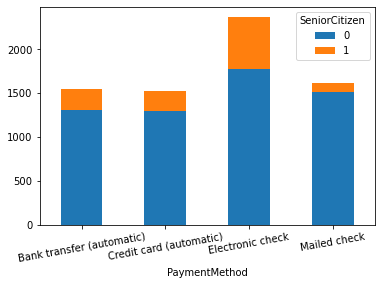

In [40]:
data_crosstab = pd.crosstab(ex["PaymentMethod"],ex["SeniorCitizen"], margins = False)
data_crosstab.plot.bar(stacked=True,rot=10)

In [43]:
d = data_crosstab.transpose()
d

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,,,,
0,1311,1301,1771,1518
1,233,221,594,94


In [58]:
data_crosstab = pd.crosstab(ex["PaymentMethod"],ex["SeniorCitizen"], margins = False)

d = data_crosstab.transpose()
c = []
for i in d.columns.to_list():
    c.append([i,d[i][0]+d[i][1]])
def Sort(sub_li):
        sub_li.sort(key = lambda x: x[1],reverse = True)
        return sub_li
Sort(c)[0][0]  ## append

'Electronic check'

In [56]:
def Sort(sub_li):
        sub_li.sort(key = lambda x: x[1],reverse = True)
        return sub_li
Sort(c)

[['Electronic check', 2365],
 ['Mailed check', 1612],
 ['Bank transfer (automatic)', 1544],
 ['Credit card (automatic)', 1522]]

In [45]:
l = [1,2]
l[1:]

[2]

In [31]:
col_detect(ex.columns.to_list(),"year_id")

c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['YEAR_ID',
 'DEALSIZE',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'PRODUCTLINE']

In [ ]:
Text1.configure(state=tk.NORMAL)
    Text1.insert(tk.END,"\n\n"+"From this we conclude that:"+'\n\n')
    Text1.insert(tk.END,"We are losing customers because of:"+'\n')
    Text1.insert(tk.END,"1) Month-to-month type Contract"+'\n')
    Text1.insert(tk.END,"2) No OnlineSecurity"+'\n')
    Text1.insert(tk.END,"3) Electronic check PaymentMethod"+'\n\n')
    Text1.insert(tk.END,"\n\n"+"From this we conclude that:"+'\n\n')
    Text1.insert(tk.END,"To increase customers we should:"+'\n')
    Text1.insert(tk.END,"1) Promote Two year Contract"+'\n')
    Text1.insert(tk.END,"2) Increase OnlineSecurity"+'\n')
    Text1.insert(tk.END,"3) Promote Credit card (automatic) PaymentMethod"+'\n\n')
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)

## Rough

In [49]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd
from PIL import ImageTk, Image
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
ex = pd.read_excel("Supply chain logisitcs problem.xlsx",sheet_name="OrderList",engine='openpyxl')
ex

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,Total wt
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000,11554.400000
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000,280352.720000
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000,142657.200000
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000,13687.520000
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000,113211.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118,798.045882
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118,798.045882
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265,72.094853
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000,689.440000


<AxesSubplot:xlabel='Ship ahead day count', ylabel='Total wt'>

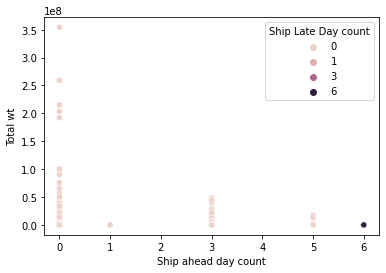

In [18]:
sns.scatterplot(data=ex, x='Ship ahead day count',y='Total wt',estimator=max,hue="Ship Late Day count")

<AxesSubplot:xlabel='Plant Code', ylabel='Unit quantity'>

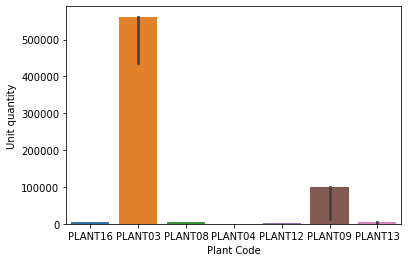

In [28]:
sns.barplot(data=ex, x='Plant Code',estimator=max,y='Unit quantity')

<AxesSubplot:xlabel='TERRITORY'>

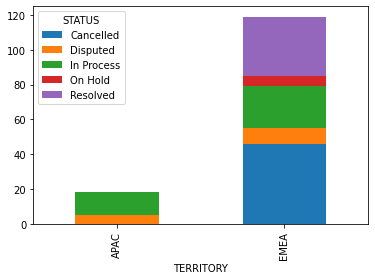

In [21]:
data_crosstab = pd.crosstab(y["TERRITORY"],y["STATUS"], margins = False)
data_crosstab.plot.bar(stacked=True)

In [31]:
ex["Churn"].value_counts().shape[0]

2

In [17]:
ex.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
num_cols = ex._get_numeric_data().columns

In [5]:
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [15]:
from scipy.stats import pointbiserialr

In [18]:
ex[num_cols[1]]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ch = le.fit_transform(ex["Churn"])
ch

array([0, 0, 1, ..., 0, 1, 0])

In [32]:
p = pointbiserialr(x=ch,y=ex[num_cols[1]])

In [34]:
p.correlation

-0.35222867011307574

In [ ]:
def col_detect(collist,keystring):
    robo_response=''
    collist.append(keystring)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(collist)
    vals = cosine_similarity(tfidf[-1], tfidf)     #32
    

    import re
    cl = collist
    for i in range(-2,0-int(len(cl)/2),-1):
        review = re.sub('[^a-zA-Z]', '',cl[vals.argsort()[0][i]])
        #review = cl[vals.argsort()[0][i]]
        robo_response += review +' '
        
    
    
    robo_response = robo_response.split(' ')
    collist.remove(collist[-1])
    return robo_response

In [12]:
num_cols.to_list()
cat_cols = [x for x in ex.columns if x not in num_cols]

In [13]:
cat_cols = [x for x in ex.columns if x not in num_cols]
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2